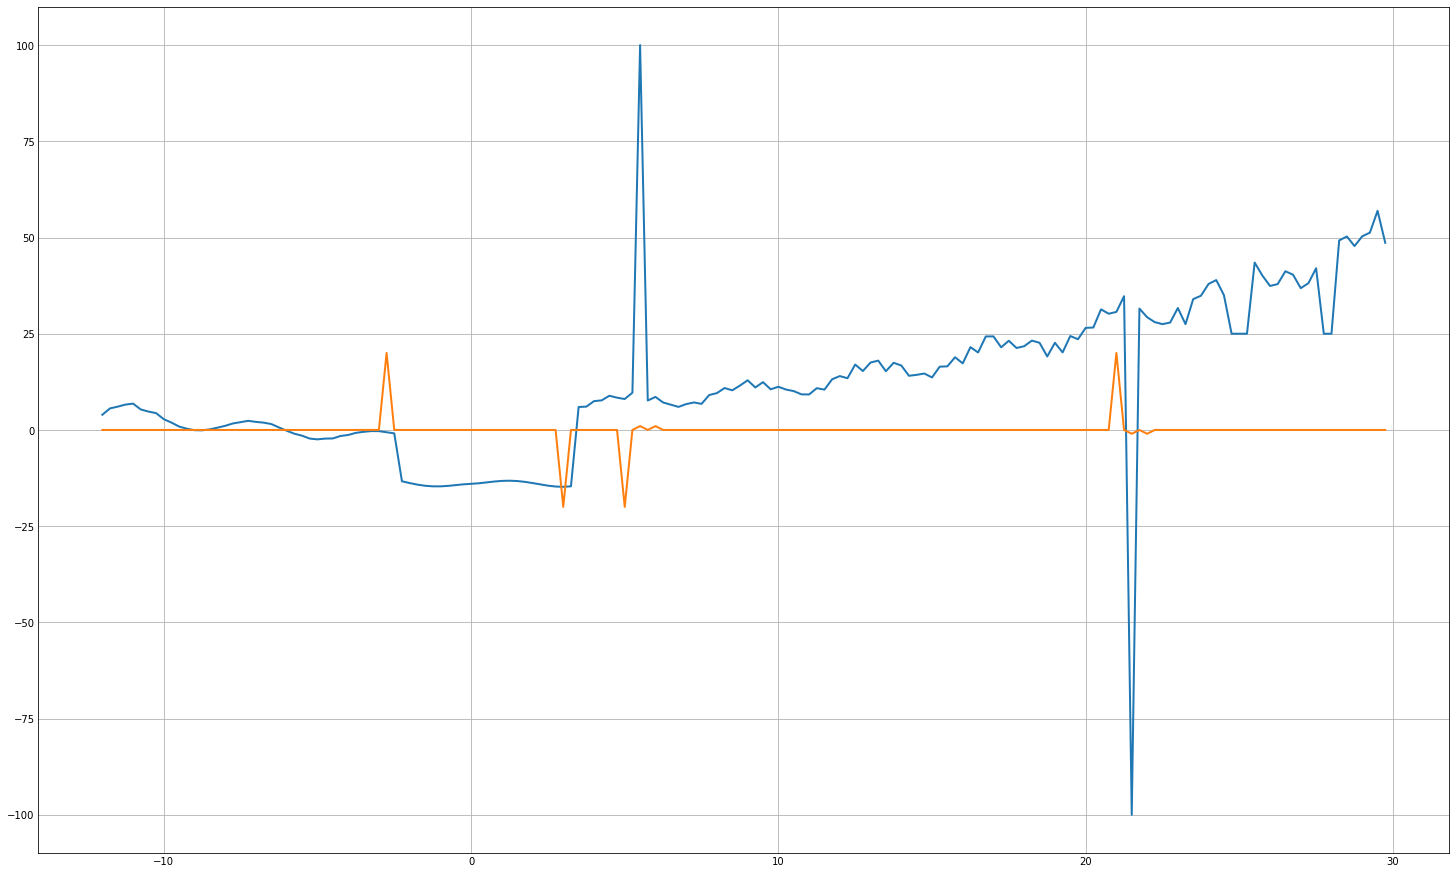

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 12 20:42:14 2022

@author: Fred Coerver
"""
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import sys
import os
import datetime
import time
import matplotlib as plt
from matplotlib import pyplot as plt
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
pd.options.display.float_format = '{:,.6f}'.format

#Userdefined module
from fad_v04 import Get_SandD



######################### READ DATA #################################################

td = pd.read_excel("./Testdata_inout2.xlsx",sheet_name="inputdata",usecols="B:C")


writer = pd.ExcelWriter("./Testdata.xlsx")
######################### INITIALIZE DATA   #########################################
kpi_input = td.columns.to_list()
t=1
P1inc= 20
accuracy = 25
window_sizeleft = 2
window_sizeright= 2
Time_scale=False
sd = 75
ignore_startsamples = 3
ignore_endsamples = 3
td_in = td[[kpi_input[0],kpi_input[t]]]
td_in = td

##########################  CALL MODULE   ###########################################
dfSin_gl, spikelist_gl = Get_SandD(td_in,
                                   acc=accuracy,
                                   windowsizeleft=window_sizeleft,
                                   windowsizeright=window_sizeright,
                                   sp_name=kpi_input[t],
                                   P1=P1inc,
                                   sd = sd,
                                   ignorestartsamples = ignore_startsamples,
                                   ignoreendsamples = ignore_endsamples,
                                   Timescale=Time_scale
                                   )

##########################    write data to excel   #################################
dfSin_gl.to_excel(writer,sheet_name="Sheet4")  
spikelist_gl.to_excel(writer,sheet_name="Sheet5") 
writer.save()
writer.close()

plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(td_in["x-value"],td_in["y-value"], linewidth=2.0)
#ax.plot(td_in["x-value"],td_in["Regr_value"], linewidth=2.0)
ax.plot(td_in["x-value"],td_in["spike"], linewidth=2.0)
#ax.plot(td_in["x-value"],td_in["Diff"], linewidth=2.0)

#ax.plot(td_in["x-value"],td_in["spikevalue"], linewidth=2.0)



In [2]:
spikelist_gl

,x-value,y-value,KPI_name,Regr_value,Value,Unixtime,Std,spike,spikevalue,Slope,Intercept,Diff,Regr_value_plus_std,Regr_value_min_std,Reason
37,-2.750000,-0.592383,y-value,-3.710306,0.000000,0,3.634194,20.000000,-3.710306,-10.663038,-33.033661,3.117922,87.144554,-94.565165,None
60,3.000000,-14.774745,y-value,-9.467986,0.000000,0,6.121153,-20.000000,-9.467986,16.373457,-58.588358,5.306759,143.560842,-162.496814,None
68,5.000000,8.036336,y-value,31.733771,0.000000,0,26.674699,-20.000000,31.733771,73.412758,-335.330021,23.697435,698.601256,-635.133713,None
70,5.500000,100.000000,y-value,8.481976,0.000000,0,0.750179,1.000000,8.481976,-0.379426,10.568819,91.518024,27.236445,-10.272494,above acc-times above regression value
72,6.000000,8.580000,y-value,30.333292,0.000000,0,27.206535,1.000000,30.333292,-74.951307,480.041137,21.753292,710.496673,-649.830088,Slope leftpoint x sd < Slope
132,21.000000,30.664563,y-value,-0.931705,0.000000,0,40.111138,20.000000,-0.931705,-103.240696,"2,167.122919",31.596268,"1,001.846736","-1,003.710146",None
134,21.500000,-100.000000,y-value,31.560135,0.000000,0,1.771757,-1.000000,31.560135,-2.382511,82.784122,131.560135,75.854054,-12.733784,above acc-times below regression value
136,22.000000,29.294000,y-value,-3.242489,0.000000,0,39.272471,-1.000000,-3.242489,100.582789,"-2,216.063847",32.536489,978.569294,-985.054271,Slope rightpoint x sd < Slope


In [3]:
dfSin_gl[55:75]

,x-value,y-value,KPI_name,Regr_value,Value,Unixtime,Std,spike,spikevalue,Slope,Intercept,Diff,Regr_value_plus_std,Regr_value_min_std,Reason
58,2.500000,-14.478069,y-value,-14.358184,0.000000,0,0.073741,0.000000,-14.478069,-1.000775,-11.856247,0.119885,-12.514651,-16.201717,0
59,2.750000,-14.705220,y-value,-14.513795,0.000000,0,0.113641,0.000000,-14.705220,-0.516128,-13.094442,0.191424,-11.672761,-17.354830,0
60,3.000000,-14.774745,y-value,-9.467986,0.000000,0,6.121153,-20.000000,-9.467986,16.373457,-58.588358,5.306759,143.560842,-162.496814,0
61,3.250000,-14.649595,y-value,-4.365873,0.000000,0,3.274893,0.000000,-14.649595,24.902875,-85.300218,10.283722,77.506458,-86.238205,set to 0 due to previous
62,3.500000,5.960940,y-value,-3.972202,0.000000,0,3.046121,0.000000,5.960940,26.085847,-95.272665,9.933142,72.180819,-80.125223,0
63,3.750000,6.055532,y-value,1.619038,0.000000,0,5.944180,0.000000,6.055532,18.475145,-67.662757,4.436494,150.223528,-146.985452,0
64,4.000000,7.480000,y-value,7.145439,0.000000,0,0.280440,0.000000,7.480000,2.987339,-4.803917,0.334561,14.156435,0.134442,0
65,4.250000,7.684806,y-value,7.699222,0.000000,0,0.486859,0.000000,7.684806,2.420469,-2.587773,0.014416,19.870687,-4.472243,0
66,4.500000,8.880476,y-value,7.895506,0.000000,0,0.190594,0.000000,8.880476,0.723499,4.639762,0.984970,12.660363,3.130649,0
67,4.750000,8.380881,y-value,8.568837,0.000000,0,0.591811,0.000000,8.380881,1.253482,2.614796,0.187956,23.364115,-6.226441,0
